In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
print(X_train[20])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38
  190  25   0   0   0   0   0   0   0   0]
 [  0   0   0  13  25  10   0   0   0   0   0   0   0   0   0   0   0 112
  252 125   4   0   0   0   0   0   0   0]
 [  0   0   0 132 252 113   0   0   0   0   0   0   0   0   0   0   0  61
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 240  79   0   0   0   0   0   0   0   0   0   0  84
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 252 238  52   0   0   0   0   0   0   0   

In [6]:
print(X_train[20].shape)

(28, 28)


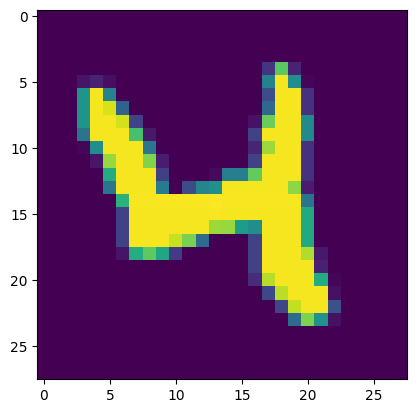

4


In [7]:
#image displaying
plt.imshow(X_train[20])
plt.show()
#levels of the image
print(Y_train[20])

In [8]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [9]:
#unique values in Y_train and Y_test
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
#Scaling
X_train = X_train/255
X_test = X_test/255

In [11]:
#print the image
print(X_train[20])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# **Building a Neural Network**

In [12]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
#Compile the neural network model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(X_train, Y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9876 - loss: 0.0419
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9888 - loss: 0.0368
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9898 - loss: 0.0344


In [23]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9650 - loss: 0.1324
0.9693999886512756
0.11956865340471268


In [24]:
Y_predicted = model.predict(X_test)
Y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([9.7712327e-05, 3.1156540e-02, 8.5235825e-03, 7.1173275e-01,
       1.0687871e-05, 1.0443848e-02, 9.3571678e-12, 9.9999475e-01,
       3.6348438e-01, 9.4712645e-02], dtype=float32)

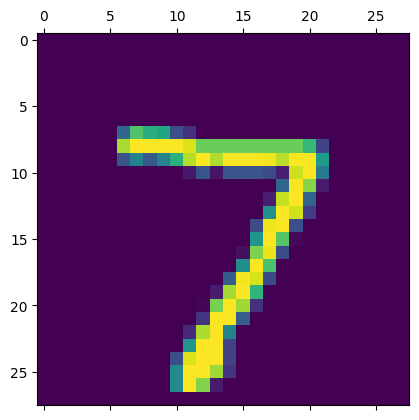

In [25]:
plt.matshow(X_test[0])

In [27]:
np.argmax(Y_predicted[0])

7

In [29]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]

In [30]:
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [32]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    0,    2,    1,    2,    1,    0,    3,    3],
       [   0, 1118,    0,    6,    0,    2,    2,    3,    4,    0],
       [   3,    3,  978,   22,    3,    1,    4,   12,    5,    1],
       [   0,    0,    4,  983,    0,    9,    0,    5,    1,    8],
       [   1,    2,    1,    1,  961,    0,    5,    2,    1,    8],
       [   3,    0,    0,   11,    0,  865,    4,    1,    4,    4],
       [   9,    3,    4,    1,    3,    6,  931,    0,    1,    0],
       [   3,    3,    5,    3,    2,    0,    0, 1004,    1,    7],
       [   6,    0,    3,   27,    4,    3,    3,    5,  912,   11],
       [   1,    5,    0,    4,   11,    4,    0,   10,    1,  973]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

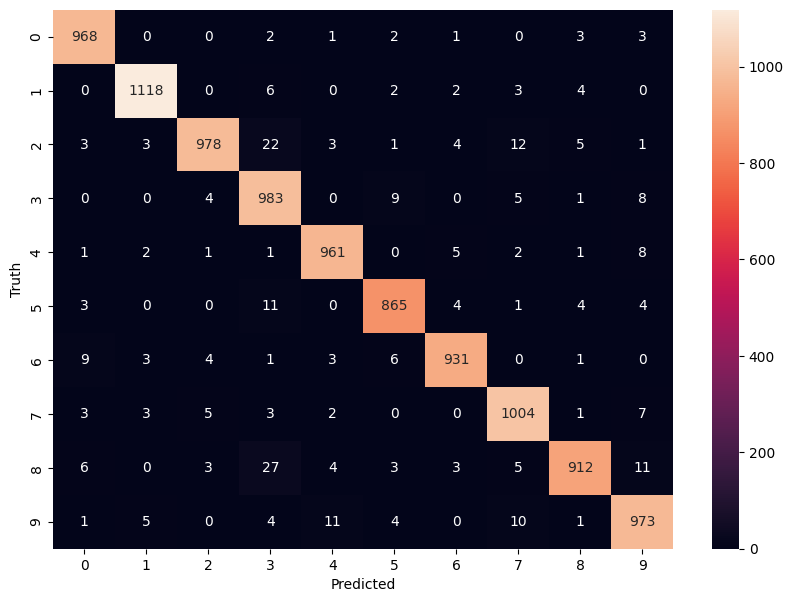

In [33]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')